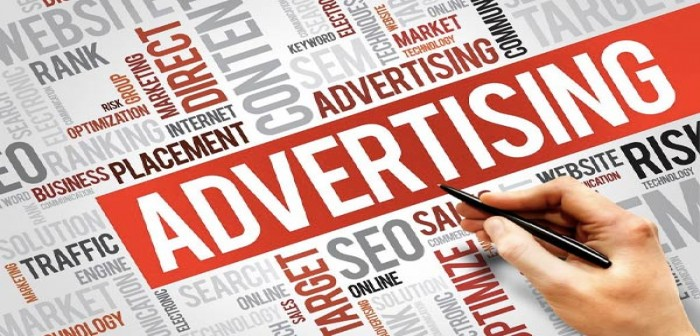

# Advertising Sales Channel Prediction

### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

### Importing important  Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the  Dataset  with Pandas:

In [3]:
# Reading the csv file from dataset
df = pd.read_csv(r'Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5



From the dataset we can notice there are 5 columns which contains both features and one target variable. Here "sales" is the target variable which contains continuous data so it is a regression type problem. Here the dataset contains the data of advertising dollars spent on TV, radio and newspaper and the label contains the sales of a single product in a given market. So in order to improve the sales, we are advertising on the mentioned features.

Also the column Unnamed is taken on the basis of index purpose, so it has no relation with our target variable. On this basis I am going to remove this column.

In [4]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


This is the dataframe after removing the column Unnamed:0 and showing the first five rows of the dataset

In [6]:
# Checking the dimension of the dataset
df.shape

(200, 4)

In [7]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Checking the types of the dataset
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

### Checking null values in the  Dataset:

In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

####  checking  the  null values Using heatmap:

<AxesSubplot:>

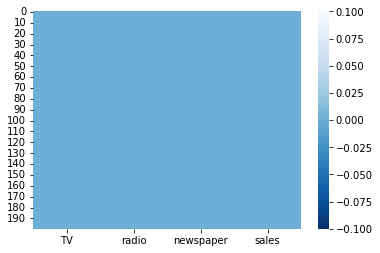

In [11]:
sns.heatmap(df.isnull(), cmap='Blues_r')

#### There is Nan values in this dataset

In [141]:
# Checking the uniqueness of target variable
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

These are the unique values present in the target variable.

In [12]:
# List of values in the target variable
df["sales"].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

This gives the list of values in the target variable which has int64 data type.

In [13]:
# Checking whether the dataset contains any space
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


So from the above observation we can say there are no spaces present in the dataset.

### Description of Dataset

In [14]:
# Statistical summary of dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

In the above description,

The mean value of TV is 147 which means this platform has good sales. But we can't conclude on this basis.
We can also notice the counts of all the columns are 200 which means no null values.
In summarizing the data we can observe that the dataset seems to be having more outliers as well as skewness in the data.

## Exploration of Data &  Visualization:

In [15]:
# Checking number of unique values in all the columns and plotting pie-chart
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

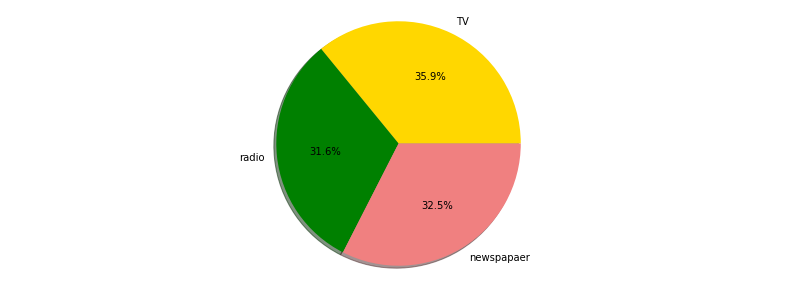

In [28]:
labels = 'TV','radio','newspapaer'
sizes = [190,167,172]
colors = ['gold','green','lightcoral']


#plot
plt.figure(figsize=(14,5))
plt.pie(sizes,labels=labels,colors = colors,
        autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

This pie chart visualizes the volume of the feature columns

### Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

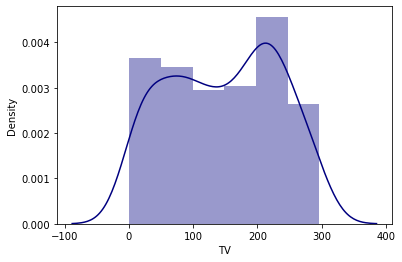

In [30]:
# Checking how the data is distributed in the column TV
sns.distplot(df["TV"], color='navy')

The data is almost normally distributed and has skewness too.

<AxesSubplot:xlabel='radio', ylabel='Density'>

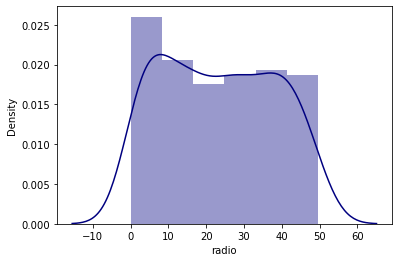

In [31]:
# Checking how the data is distributed in the column radio
sns.distplot(df["radio"], color ='navy')

The data is almost normally distributed.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

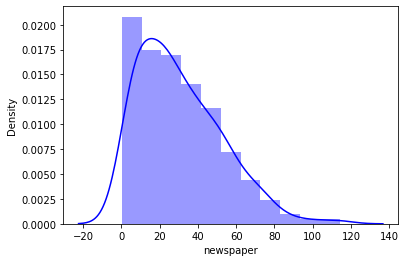

In [32]:
# Checking how the data is distributed in the column newspaper
sns.distplot(df["newspaper"], color='blue')

Here the data in the newpaper feature contains left skewness.

<AxesSubplot:xlabel='sales', ylabel='Density'>

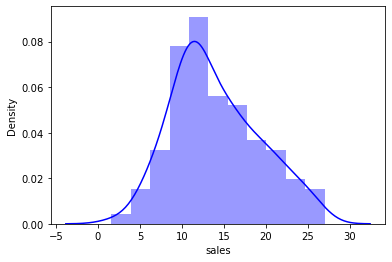

In [33]:
# Checking how the data is distributed in the target variable sales
sns.distplot(df["sales"],  color ='blue')

Here the data in the newpaper feature contains left skewness.

The data is almost normally distributed.

From the above plotting analysis we can say that the data in the columns are almost normally distributed and some columns contains skewness. So we will treat this skewness in the later part.

### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between TV and radio'}, xlabel='TV', ylabel='radio'>

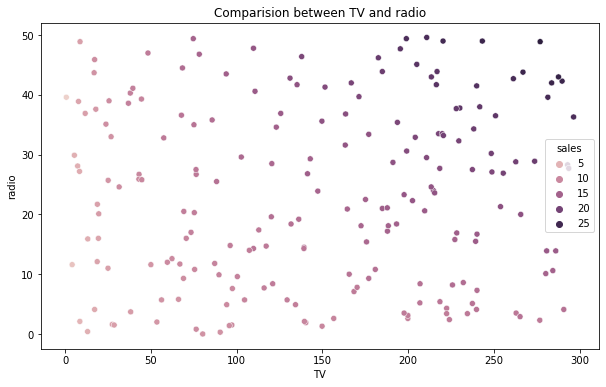

In [43]:
# Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"])

Here we can see the data is scattered so there is no linear relationship while comparing TV and radio. As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we spend more money than this then we can see the increment in the sales.

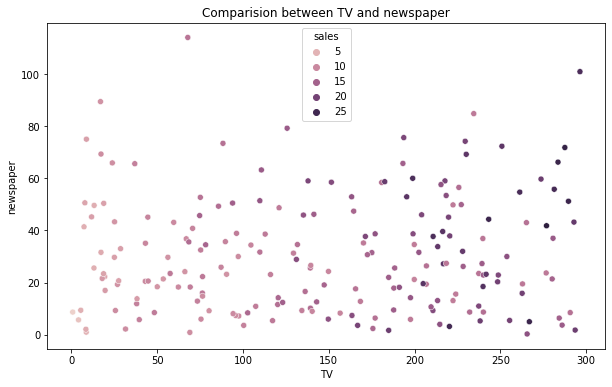

In [44]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);


Here we can see the data is scattered so there is no linear relationship while comparing TV and radio. As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we spend more money than this then we can see the increment in the sales.

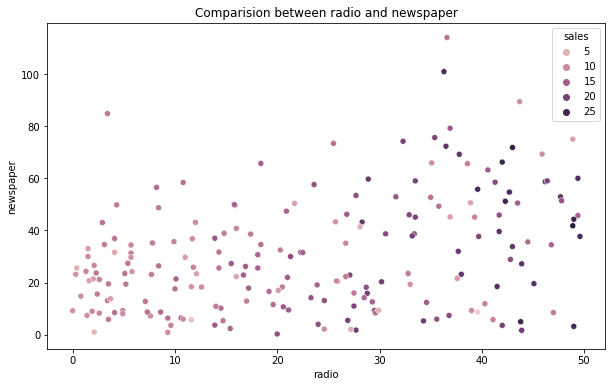

In [45]:

# Checking the relation between radio and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df["sales"]);


This is the comparision between the radio and newspaper on the basis of sales. There is no linear relationship between these features. Also we can witness some outliers present here.

From the above plots we can notice, if we invest more money then we get more sales in all the platforms.

Now let's see the relationship between the features and label.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

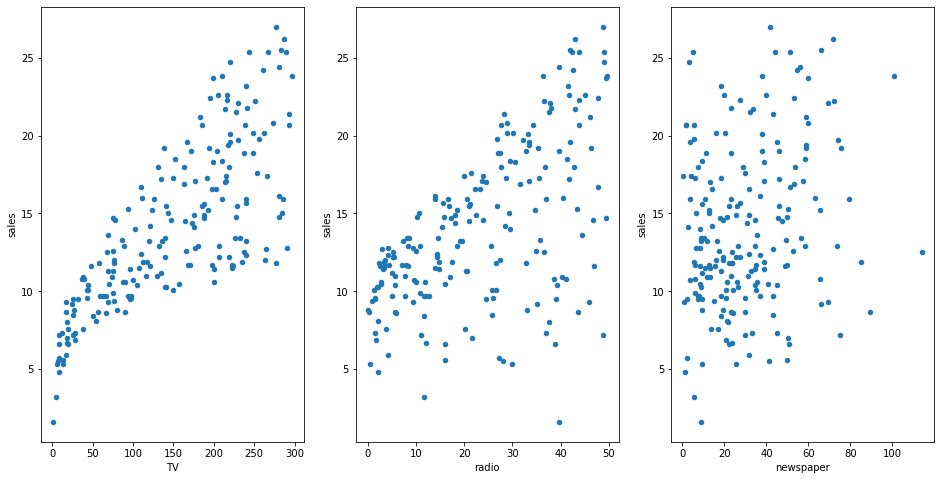

In [46]:
# Visualizing the relationship between the features and the label 
fig, axs = plt.subplots(1,3)

df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0], figsize = (16,8))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1])
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2])

From the above graphs, it can be observed that there seems to be a linear relationship between the features TV, Radio with the sales.

TV vs sales
We can notice the linear relation between TV and sales. This means if we increase our investment in advertising the product on TV then there is an improvemnt in our sales and getting upto 80% profit too. Which means there is a positive linear relationship.

Radio vs sales
Here also we can observe the linear relationship between radio and sales. This means if we invest in advertising the product on radio then also we can get a profit in our sales but not more as TV. And we can say we are getting 45%(say) profit. But there is no loss in advertising on radio.

Newspaper vs sales
In case of newspaper there is no relationship with sales which means advertising the product on newspaper will not improve our sales also we get more loss by investing money on newspaper. So we can say may be newspaper is not the best platform to invest the money. But we cannot conclude on this basis, will move further and analyze it.

### Multivariate Analysis

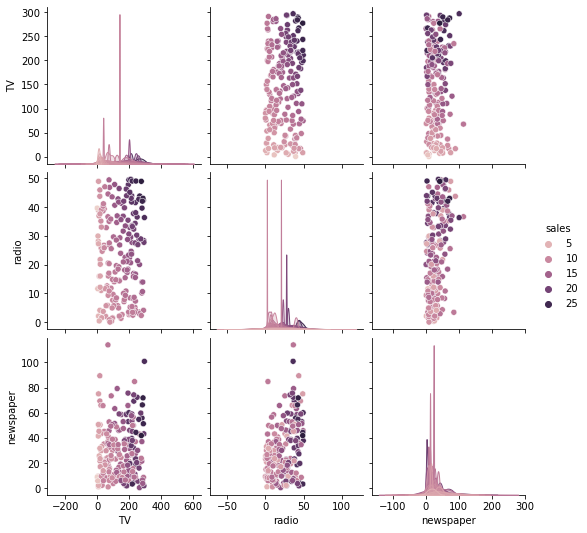

In [47]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="sales")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'sales'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. As we can see the features TV and radio are highly correlated.

<AxesSubplot:xlabel='TV', ylabel='Count'>

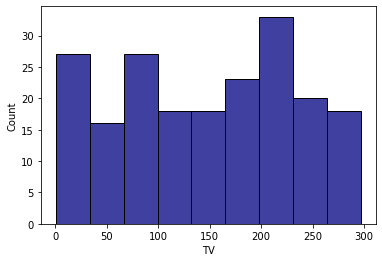

In [49]:
sns.histplot(df['TV'], color='navy')

The histogram represents the distribution of "TV" column is uniform.

<AxesSubplot:xlabel='radio', ylabel='Count'>

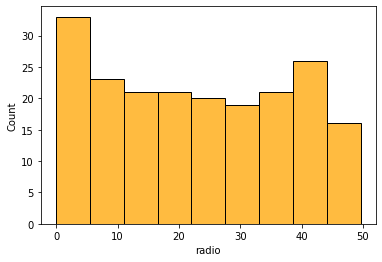

In [50]:
sns.histplot(df["radio"], color='orange')

The histogram represents the distribution of "radio" column is uniform.

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

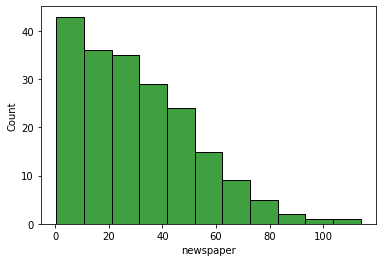

In [51]:
sns.histplot(df["newspaper"], color ='green')

The histogram represents the distribution of "newspaper" is ununiform, it is skewed positively.

## Correlation Analysis 

In [52]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map

#### Correlation using  the  heatmap

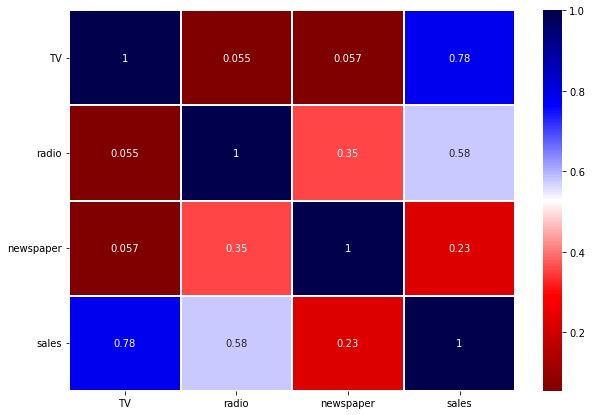

In [58]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),linewidths=.1,cmap="seismic_r",annot = True)
plt.yticks(rotation=0);


The heat map contains only positive correlation.

We can observe the target variable sales are highly correlated with TV.
sales are moderately correlated with radio.
sales are less correlated with newspaper.
There is a less correlation between TV and newspaper also TV and radio.
We can also see there is no high correlation between feature to feature which means there is no multicollinearity problem.

In [59]:
cor['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

## Visualizing the correlation between label and features using bar plot

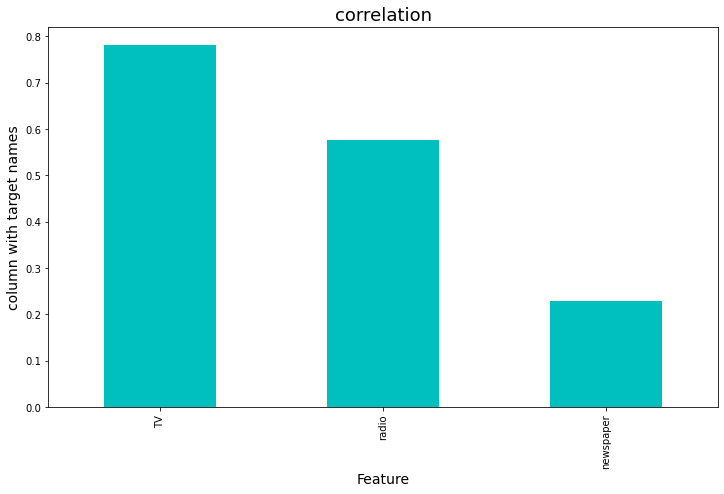

In [60]:
plt.figure(figsize=(12,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here we can easily observe the correlation as sales are highly correlated with TV, moderately correlated with radio and less correlated with newspaper.

## Identifying the outliers

<AxesSubplot:>

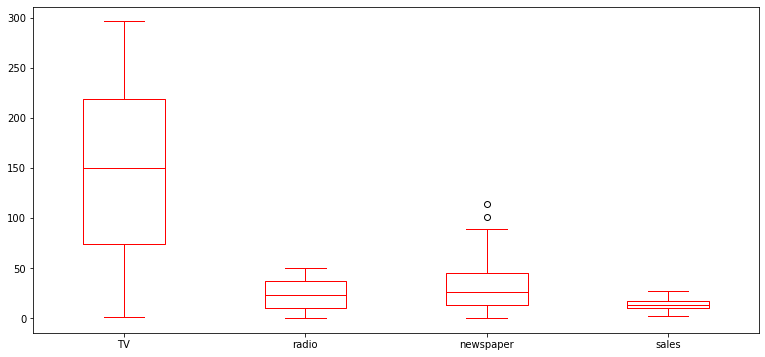

In [62]:
df.plot(kind="box", figsize = (13,6), color="r")

There are outliers present only in newpaper on the maximum side of the boxplot. Let's remove those outliers.

# Removing outliers

### 1. Zscore method

In [63]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [64]:
variables = df[["newspaper"]]

In [65]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


This is the new dataframe after removing the outliers.

In [66]:
df.shape

(200, 4)

The original dataset contains 200 rows and 4 columns.

In [67]:
new_df.shape

(198, 4)

The new dataframe contains 198 rows and 4 columns.

In [68]:
# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0


There is only 1% data loss. Here I am not losing more data so I am removing the outliers. Now let's checkthe dataloss using IQR method.

### 2. IQR (Inter Quantile Range) method

In [69]:
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Now the outliers have been removed using IQR method

In [70]:
df.shape

(200, 4)

In [71]:
df1.shape

(198, 4)

The new dataframe after using IQR method has 198 rows and 4 columns.

In [72]:

# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0


So here also we are getting 1% data loss using IQR method. We can use any of these methods so, let me consider Zscore method.

### Checking for skewness

In [73]:

# Checking the skewness
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Skewness threshold is taken as +/- 0.65.


Only newspaper has skewness, let's remove the skewness.

### Removing Skewness using  power  transform method 

In [74]:
feature = ["newspaper"]

In [75]:

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [76]:
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [77]:
# Now let's check the skewness after applying yeo-johnson method.
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64


We can see the skewness has been removed. Now let's visualize it by using distplot.

#### Plotting  the  normal  dist  plot here 

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

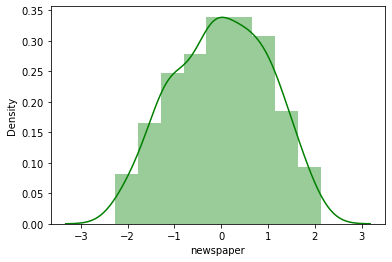

In [78]:
# After removing let's check how the data has been distributed in each column.

sns.distplot(new_df["newspaper"],  color ='g')

Now the feature newpaper looks normally distributed and has no skewness.

In [79]:
# cleaned dataset
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,1.604196,22.1
1,44.5,39.3,0.831044,10.4
2,17.2,45.9,1.607052,9.3
3,151.5,41.3,1.283768,18.5
4,180.8,10.8,1.280622,12.9
...,...,...,...,...
195,38.2,3.7,-0.687435,7.6
196,94.2,4.9,-1.146090,9.7
197,177.0,9.3,-1.314437,12.8
198,283.6,42.0,1.517395,25.5


This is our cleaned dataset.

### Data preprocessing

##### Separating the independent and target variables into x and y

In [83]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

In [84]:
# dataset containing only features
x

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622
...,...,...,...
195,38.2,3.7,-0.687435
196,94.2,4.9,-1.146090
197,177.0,9.3,-1.314437
198,283.6,42.0,1.517395


## Scaling data with standard scaler

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


This is our scaled data using standard scaler.

### creating   the  Model  for  the  predictions

##### Finding best random state

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9358346827439895 on Random_state  90


So, here getting the maximum r2 score as 93% on the random state 90.

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = maxRS)

As  we  have  to predict the  sales  thus  it is  a continious  value , so we  have  to can  understand by this  that  these problem  is  a Regression problem

### Importing  all  the  Regression Algorithms

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Linear Regression

In [92]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.9358346827439895
Mean abs error: 1.029386786308399
Mean squared error: 1.5796296226361315


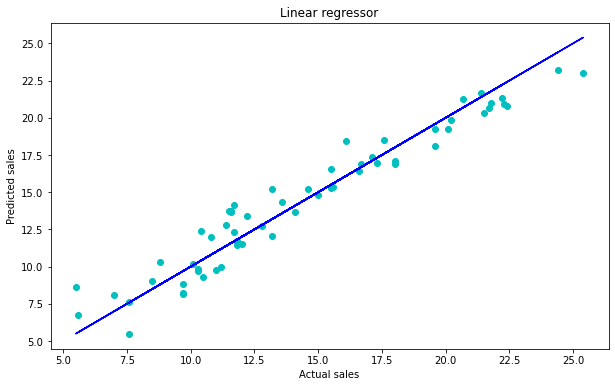

In [96]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Linear regressor")
plt.show()

So we can see  that we  have  got  a  very good  accuracy  with  the help of  Linear  regression model  which is 93%

### Random Forest Regressor

In [107]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=90)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.9736204897912449
Mean abs error: 0.6600444444444512
Mean squared error: 0.6494140064814905


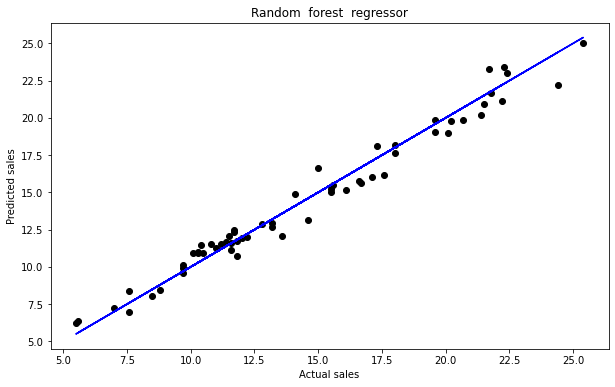

In [110]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='black')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Random  forest  regressor")
plt.show()

The R2 score using Random Forest Regressor is 97%.

### KNN Regressor

In [114]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.925394255631917
Mean abs error: 0.9446666666666669
Mean squared error: 1.836653333333334


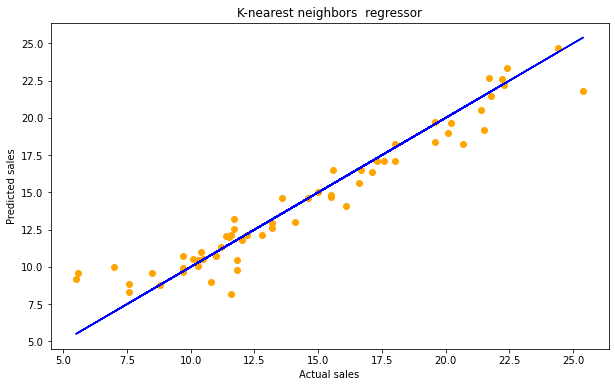

In [116]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("K-nearest neighbors  regressor")
plt.show()

The R2 score using KNN Regressor is 92%.

### Stochastic Gradient Descent Regressor

In [128]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor(epsilon=1, max_iter=500, alpha=0.001,fit_intercept=True)
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))

R2_Score: 0.9347475942270911
Mean abs error: 1.0441011654549237
Mean squared error: 1.6063917006115103


The R2 score using SGD Regressor is 93%

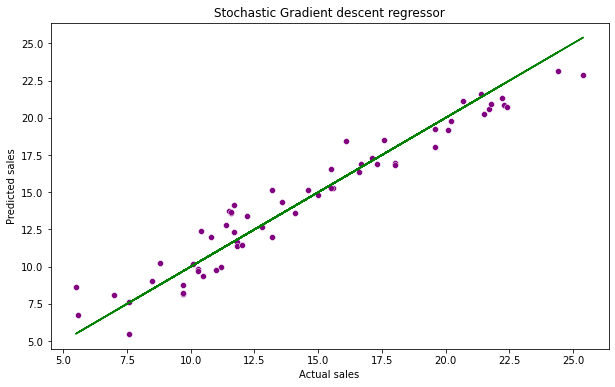

In [187]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=predSGD,color='purple')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Stochastic Gradient descent regressor")
plt.show()

### Checking the cross validation score

Thus we  have  good accuracy on mostly  all the  models but  there  might be chances   that they  are overfitted while  training  so for  removing  the Over fitting  we  have   to use cross  validation.

In [135]:
from sklearn.model_selection import cross_val_score

In [140]:
# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=7).mean())

The CV score  for Linear_regression is : 0.8840746377370333


In [141]:
# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.9772000164869434


In [142]:
# Checking cv score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=7).mean())

The CV score  for  the KNN regressor is : 0.9353670698706963


In [143]:
# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=7).mean())

The  CV score for the SGD  regressor is : 0.8844160503629743



From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor is our best fitting model

In [163]:
score= pd.DataFrame({'CV_RFR':0.9772000164869434, 'R2_score_RFR':0.9736204897912449}, index=['0'])

In [164]:
score

,CV_RFR,R2_score_RFR
0,0.9772,0.97362


so  we  can see  that after  using  the  CV on random forest our   model  is  working  lttle  better   then  earlier and  got a  very  good  score of 97%

## Hyperparameter tuning

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,400],
             'max_depth':[2,4,6]}

In [168]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=6)

In [169]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 400]})

In [170]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 400}

This gives the best parameter value.

In [176]:
Add_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=300)
Add_sales.fit(x_train, y_train)
pred_GCV = Add_sales.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 97.20741783228642


### The  final model Graph

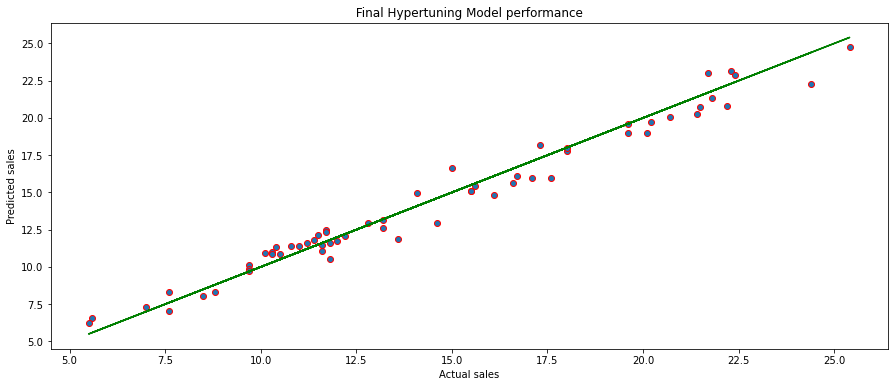

In [199]:
#Verifying the performance of the model by graph
plt.figure(figsize=(15,6))
plt.scatter(x=y_test,y=pred_GCV, edgecolors='red', linewidth=1, cmap='Set3')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title(" Final Hypertuning Model performance ")
plt.show()

After tuning the model Random Forest Regressor, we are getting R2 score as 97% which is good.

### Saving the model

In [200]:
import joblib

joblib.dump(Add_sales,'Add_Sales_Channel.obj')

['Add_Sales_Channel.obj']

In [201]:
loadmodel = joblib.load('Add_Sales_Channel.obj')

### Conclusion & prediction by  the  final model 

In [202]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,18.0,17.758667
1,5.6,6.581500
2,22.3,23.143167
3,19.6,19.560000
4,16.6,15.606333
5,22.2,20.806167
6,21.5,20.765167
7,13.2,12.640500
8,22.4,22.865333
9,8.8,8.334333


<Figure size 864x360 with 0 Axes>

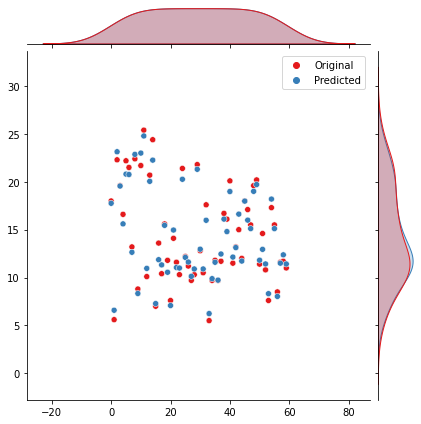

In [241]:
plt.figure(figsize=(12,5))
sns.jointplot(data =df_com, kind='scatter',ratio=8, palette ='Set1')


In [243]:
model = df_com.to_csv('sales_predictor.csv')
model

### model  prediction saved  in CSV format

Thankyou!